In [63]:
#move to requirements.txt
import pandas as pd
import numpy as np
from collections import Counter
import re
import qgrid
import chart_studio.plotly as py
import plotly.graph_objs as go
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
py.sign_in('stannida19', 'xB5NhahpUVK3Q3t6O8oZ')
#chart_studio.tools.set_credentials_file(username='stannida19', api_key='xB5NhahpUVK3Q3t6O8oZ')
#import emoji

# The dataset
#### The following table shows the dataset that has been collected from the multiple Tinder accounts. 
#### The columns represent the following information:
name -  firstname of a person in Tinder <br>
age -  age in Tinder (cannot be hidden in regular accounts) <br>
bio -  biography of a person in Tinder (can be empty) <br>
n of Words -  number of words in bio <br>
distance -  the number of kilometers a person is away from an account that has been used for crawling <br>
school -  boolean variable, shows if an education is mentioned <br>
job -  boolean variable, shows if work is mentioned <br>
pictures -  number of photos that a person has in an account (cannot be 0) <br>
instagram -  boolean variable, shows if Instagram account is linked <br>
location -  a city from where accounts have been crawled <br>

In [15]:
men=pd.read_csv('man.csv', index_col=False)
women=pd.read_csv('woman.csv', index_col=False)

def calculate_words(line):
    bio =''.join(str(line))
    if 'nan' in bio:
        return 0
    else:
        return(len(re.findall(r'\w+', bio)))
def initialize(df):
    df['n of Words'] = np.nan
    df['bio'] = df["bio"].str.lower()
    for index, row in df.iterrows():
        df.at[index, 'n of Words'] = calculate_words(row['bio'])
    df=df[['name', 'age', 'bio', 'n of Words', 'distance', 'school', 'job',
           'pictures', 'instagram', "spotify",'location']].drop(['spotify'], axis=1)
    return df

men = initialize(men)
women = initialize(women)
qgrid.show_grid(men)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
qgrid.show_grid(women)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
#cleaning the text, so that the frequency is calculated correctly
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_stop_words(data):
    stop_words_en = stopwords.words('english')
    stop_words_de = set(stopwords.words('german'))
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words_en and w not in stop_words_de and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stankeaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/stankeaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
def preprocess(data):
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [34]:
def counting_frequency(df):
    processed_text = []
    for bio in df['bio']:
        processed_text.append(word_tokenize(str(preprocess(str(bio)))))
    DF = {}

    for i in range(len(processed_text)):
        tokens = processed_text[i]
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}

    for i in DF:
        DF[i] = len(DF[i])
    return(DF)

In [41]:
women_freq = counting_frequency(women)
men_freq = counting_frequency(men)

# Description of the dataset
#### The following tables show the 15 most frequent words used by male and female accounts collected from Tinder
The biographies have been cleaned and stemmed in order to get more representative results <br>
#### Female accounts:

In [52]:
women_freq_df = pd.DataFrame(list(women_freq.items()), columns=['word', 'frequency'])
women_freq_df = women_freq_df[women_freq_df['word']!='nan']
women_freq_df.sort_values(by=['frequency'], ascending=False).head(15)

,word,frequency
60,one,27
443,seventi,26
62,hundr,25
137,instagram,23
26,berlin,21
50,insta,21
430,ig,19
127,lieb,14
121,gern,14
877,sixti,13


#### Male accounts:

In [54]:
men_freq_df = pd.DataFrame(list(men_freq.items()), columns=['word', 'frequency'])
men_freq_df = men_freq_df[men_freq_df['word']!='nan']
men_freq_df.sort_values(by=['frequency'], ascending=False).head(15)

,word,frequency
45,one,50
32,eighti,43
166,hundr,39
321,new,29
6,travel,28
25,look,27
102,student,25
347,live,23
97,twenti,23
23,love,22


In [65]:
age_w = women['age'].value_counts().to_dict()
age_m = men['age'].value_counts().to_dict()
age_m.update((x,y*(-1)) for x,y in age_m.items())
layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-120, 120],
                       tickvals=[-120, -80, -50, -20, 0, 20, 50, 80, 120],
                       ticktext=[120, 80, 50, 20, 0, 20, 50, 80, 120],
                       title='Number of people'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(x=list(age_m.values()),
               y=list(age_m.keys()),
               orientation='h',
               name='Men',
               hoverinfo='x+y',
               marker=dict(color='orange')
               ),
        go.Bar(x = list(age_w.values()), 
               y = list(age_w.keys()),
               orientation='h',
               name='Women',
               hoverinfo='x+y',
               marker = dict(color='seagreen')
               )]

py.iplot(dict(data=data, layout=layout)) 

In [66]:
w_school = women['school'].value_counts().to_dict()
layout = go.Layout(title = "School is mentioned - women")
trace = go.Pie(labels=['No', 'Yes', "More than 1 school"], values=list(w_school.values()),
               hoverinfo='label+value', textinfo='percent', 
               textfont=dict(size=20))
py.iplot(dict(data=[trace], layout=layout)) 

In [67]:
m_school = men['school'].value_counts().to_dict()
layout = go.Layout(title = "School is mentioned - men")
trace = go.Pie(labels=['No', 'Yes', "More than 1 school"], values=list(m_school.values()),
               hoverinfo='label+value', textinfo='percent', 
               textfont=dict(size=20))
py.iplot(dict(data=[trace], layout=layout))

In [68]:
m_job = men['job'].value_counts().to_dict()
layout = go.Layout(title = "Job is mentioned - men")
trace = go.Pie(labels=['No', 'Yes'], values=list(m_job.values()),
               hoverinfo='label+value', textinfo='percent', 
               textfont=dict(size=20))
py.iplot(dict(data=[trace], layout=layout)) 

In [69]:
w_job = women['job'].value_counts().to_dict()
layout = go.Layout(title = "Job is mentioned - women")
trace = go.Pie(labels=['No', 'Yes'], values=list(w_job.values()),
               hoverinfo='label+value', textinfo='percent', 
               textfont=dict(size=20))
py.iplot(dict(data=[trace], layout=layout)) 

In [257]:
def gini_coeff(x):
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x)) # calculates zero-based ranks
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)

m_n_words=men.loc[:,["n of Words"]].values
w_n_words=women.loc[:,["n of Words"]].values
print("Gini coefficient for N of photos, men: ", gini_coeff(men["pictures"]),"\nGini coefficient for N of words, men: ",
      gini_coeff(men["n of Words"]))
print("Gini coefficient for N of photos, women: ", gini_coeff(women["pictures"]),"\nGini coefficient for N of words, women: ",
      gini_coeff(women["n of Words"]))
print("Percentage of empty Bio: ", (men["bio"].isnull().sum()/men["bio"].count())*100) 
print("Percentage of empty Bio: ", (women["bio"].isnull().sum()/women["bio"].count())*100) 

Gini coefficient for N of photos, men:  0.28643325763310623 
Gini coefficient for N of words, men:  0.6881202217125382
Gini coefficient for N of photos, women:  0.2635324873692868 
Gini coefficient for N of words, women:  0.7693184512050573
Percentage of empty Bio:  53.0612244898
Percentage of empty Bio:  67.1309192201


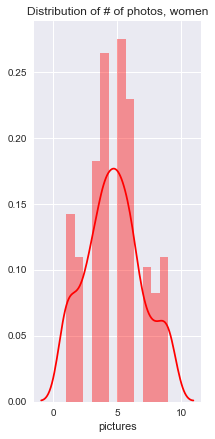

In [260]:
import seaborn as sns
import matplotlib
sns.set(color_codes=True)
w_hist_photos = sns.distplot(women['pictures'], color="red").set_title("Distribution of # of photos, women")
matplotlib.pyplot.show(w_hist_photos)

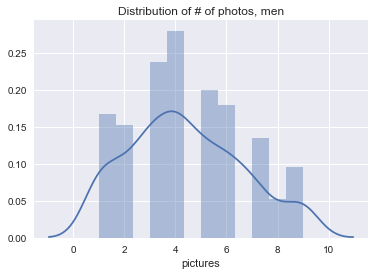

In [185]:
m_hist_photos = sns.distplot(men['pictures']).set_title("Distribution of # of photos, men")
matplotlib.pyplot.show(m_hist_photos)

In [255]:
city_1 = men.loc[men["location"] == "Koblenz"]
city_2 = men.loc[men["location"] == "Munich"]
city_3 = men.loc[men["location"] == "Cologne"]
city_4 = men.loc[men["location"] == "Berlin"]
city_5 = men.loc[men["location"] == "Frankfurt"]
sns.distplot( city_1["pictures"] , color="skyblue", label="Koblenz", hist=False, rug=True)
sns.distplot( city_2["pictures"] , color="pink", label="Munich", hist=False, rug=True)
sns.distplot( city_3["pictures"] , color="orange", label="Cologne", hist=False, rug=True)
sns.distplot( city_4["pictures"] , color="green", label="Berlin", hist=False, rug=True)
sns.distplot( city_5["pictures"] , color="yellow", label="Frankfurt", hist=False, rug=True)
sns.set(rc={'figure.figsize':(15,20)})
sns.set_ylim(bottom=0)
#matplotlib.pyplot.show()
sns.plt.show()


AttributeError: module 'seaborn' has no attribute 'set_ylim'

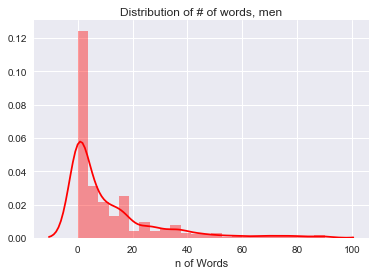

In [195]:
sns.set(color_codes=True)
m_hist_words = sns.distplot(men['n of Words'], color="red").set_title("Distribution of # of words, men")
matplotlib.pyplot.show(m_hist_words)

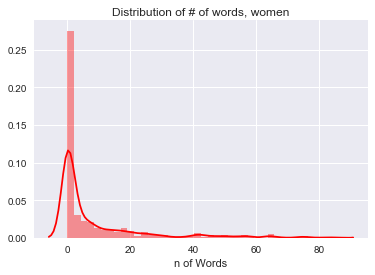

In [196]:
w_hist_words = sns.distplot(women['n of Words'], color="red").set_title("Distribution of # of words, women")
matplotlib.pyplot.show(w_hist_words)

In [200]:
from scipy import stats
N = men.shape[0]
var_f = women['n of Words'].var(ddof=1)
var_m = men['n of Words'].var(ddof=1)
s = np.sqrt((var_f + var_m)/2)
t = (women['n of Words'].mean() - men['n of Words'].mean())/(s*np.sqrt(2/N))
degf = 2*N - 2
p = 1 - stats.t.cdf(abs(t),df=degf)
print("t = " + str(t))
print("p = " + str(2*p))

t = -3.36190068802
p = 0.000798505525796


In [201]:
var_f = women['pictures'].var(ddof=1)
var_m = men['pictures'].var(ddof=1)
s = np.sqrt((var_f + var_m)/2)
t = (women['pictures'].mean() - men['pictures'].mean())/(s*np.sqrt(2/N))
degf = 2*N - 2
p = 1 - stats.t.cdf(abs(t),df=degf)
print("t = " + str(t))
print("p = " + str(2*p))

t = 2.53589868233
p = 0.0113421361545


In [202]:
women['pictures'].mean()

4.7283333333333335

In [203]:
men['pictures'].mean()

4.403333333333333

In [204]:
men['n of Words'].mean()

11.626666666666667

In [205]:
women['n of Words'].mean()

8.436666666666667

In [70]:
inst_w = women['instagram'].value_counts().to_dict()
inst_m = men['instagram'].value_counts().to_dict()
layout = go.Layout(yaxis=go.layout.YAxis(title='Number of people'),
                   xaxis=go.layout.XAxis(
                       title='Is instagram linked'),
                   bargap=0.1)
data = [go.Bar(y=list(inst_w.values()),
               x=list(inst_w.keys()),
               name='Women',
               hoverinfo='x+y',
               marker=dict(color='orange')
               ),
        go.Bar(y = list(inst_m.values()), 
               x = list(inst_m.keys()),
               name='Men',
               hoverinfo='x+y',
               marker = dict(color='seagreen')
               )]

py.iplot(dict(data=data, layout=layout)) 

In [233]:
inst_w = women['instagram'].value_counts()
inst_m = men['instagram'].value_counts()
instagram = pd.concat([inst_w, inst_m], axis=1)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(instagram)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
8.18226891748


===Degrees of Freedom===
1


===P-Value===
0.00423018168145


===Contingency Table===
[[ 492.5  492.5]
 [ 107.5  107.5]]
